<a href="https://colab.research.google.com/github/Jarnoesse/IA-AGN-with-ML/blob/main/Data_exploration_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u

import seaborn as sns

Download of the dataset and separation of the different sources

In [160]:
table_RACS_catalogue_URL = 'http://oal.ul.pt/data/AlmaQA2/Catalogs_cV1ax509ZbXXx978pb3/RACS_VEXAS_ALLWISE_DES_PS1_SkyMapper_specZ_milliquas_v3.fits.gz'
table_RACS_cat = Table.read(table_RACS_catalogue_URL)

table_RACS_cat_df = table_RACS_cat.to_pandas() # convert to Pandas Dataframe

In [161]:
attributes = ["MAG_AUTO_G_DES","MAG_AUTO_R_DES","MAG_AUTO_I_DES","MAG_AUTO_Z_DES","MAG_AUTO_Y_DES","z_spec_1","spec_class_1"]
DES_df = table_RACS_cat_df[attributes].copy()

attributes = ["GPETMAG_PS","RPETMAG_PS","IPETMAG_PS","ZPETMAG_PS","YPETMAG_PS","z_spec_2","class_2_2"]
PS_df = table_RACS_cat_df[attributes].copy()

attributes = ["U_PETRO_SM","V_PETRO_SM","G_PETRO_SM","R_PETRO_SM","I_PETRO_SM","Z_PETRO_SM","z_spec_3","spec_class_3"]
SM_df = table_RACS_cat_df[attributes].copy()


In [173]:
DES_df  = DES_df[DES_df["spec_class_1"]>=0]

PS_df = PS_df[PS_df["class_2_2"]>=0]

SM_df = SM_df[SM_df["U_PETRO_SM"] >= 0]


In [163]:
DES_df_0 = DES_df[DES_df["spec_class_1"] == 0]
DES_df_1 = DES_df[DES_df["spec_class_1"] == 1]
DES_df_2 = DES_df[DES_df["spec_class_1"] == 2]

PS_df_0 = PS_df[PS_df["class_2_2"] == 0]
PS_df_1 = PS_df[PS_df["class_2_2"] == 1]
PS_df_2 = PS_df[PS_df["class_2_2"] == 2]

SM_df_0 = SM_df[SM_df["spec_class_3"] == 0]
SM_df_1 = SM_df[SM_df["spec_class_3"] == 1]
SM_df_2 = SM_df[SM_df["spec_class_3"] == 2]

In [164]:
table_RACS_cat_df.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259252 entries, 0 to 259251
Data columns (total 167 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   col1                   259252 non-null  int32  
 1   id                     259252 non-null  int32  
 2   catalogue_id           259252 non-null  int16  
 3   n_components           259252 non-null  int16  
 4   ra_deg_cont            259252 non-null  float64
 5   dec_deg_cont           259252 non-null  float64
 6   freq                   259252 non-null  float32
 7   maj_axis               259252 non-null  float32
 8   min_axis               259252 non-null  float32
 9   pos_ang                259252 non-null  float32
 10  flux_int               259252 non-null  float64
 11  flux_int_err           259252 non-null  float32
 12  flux_peak              259252 non-null  float64
 13  mean_background        259252 non-null  float32
 14  background_noise       259252 non-n

In [165]:
DES_df.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12157 entries, 2 to 259245
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MAG_AUTO_G_DES  12157 non-null  float32
 1   MAG_AUTO_R_DES  12157 non-null  float32
 2   MAG_AUTO_I_DES  12157 non-null  float32
 3   MAG_AUTO_Z_DES  12157 non-null  float32
 4   MAG_AUTO_Y_DES  12157 non-null  float32
 5   z_spec_1        12157 non-null  float64
 6   spec_class_1    12157 non-null  Int16  
dtypes: Int16(1), float32(5), float64(1)
memory usage: 463.0 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04121b2a50>,
      dtype=object)

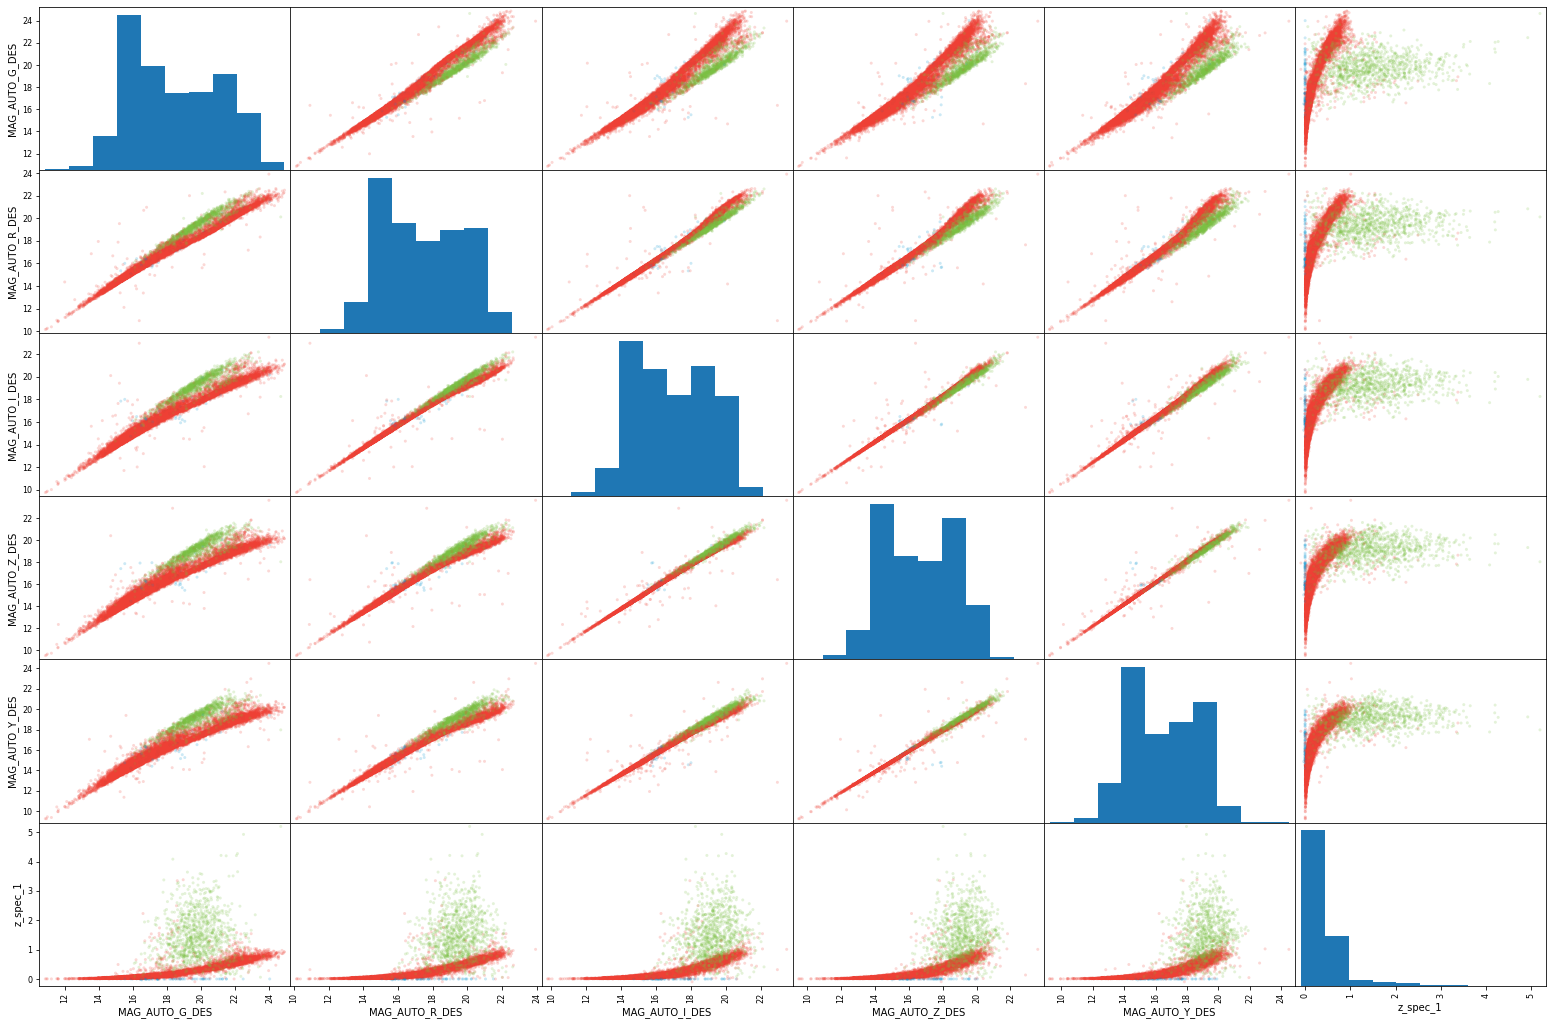

In [166]:
attributes = ["MAG_AUTO_G_DES","MAG_AUTO_R_DES","MAG_AUTO_I_DES","MAG_AUTO_Z_DES","MAG_AUTO_Y_DES","z_spec_1"]

color_wheel = {0: "#0392cf", #blue Star
               1: "#7bc043", #green AGN
               2: "#ee4035"} #red Galaxy

colors = DES_df["spec_class_1"].map(lambda x: color_wheel.get(x))

scatter_matrix(DES_df[attributes],color = colors,alpha = 0.2, figsize=(27,18))

In [167]:
PS_df

,GPETMAG_PS,RPETMAG_PS,IPETMAG_PS,ZPETMAG_PS,YPETMAG_PS,z_spec_2,class_2_2
1,15.941400,15.413200,15.260400,15.092500,14.890800,0.082210,2
2,16.163799,15.585900,15.328400,15.168600,14.653500,0.062222,2
3,16.637300,16.535601,16.650400,16.141500,15.974600,0.392060,2
4,19.993900,20.211300,20.043501,19.764500,20.200899,2.366051,1
5,19.777300,18.771099,18.331699,17.927900,17.819201,0.271035,2
...,...,...,...,...,...,...,...
259233,18.532200,18.446199,18.419001,18.240999,18.137199,2.629645,1
259235,13.802200,13.586000,11.019500,13.312600,12.219300,0.033990,2
259236,21.253700,21.582800,20.936800,20.098900,20.440599,0.195315,1
259241,19.042500,18.805700,18.977900,18.801001,18.400801,0.962628,1


In [168]:
PS_df.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12711 entries, 1 to 259245
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GPETMAG_PS  12711 non-null  float32
 1   RPETMAG_PS  12711 non-null  float32
 2   IPETMAG_PS  12711 non-null  float32
 3   ZPETMAG_PS  12711 non-null  float32
 4   YPETMAG_PS  12711 non-null  float32
 5   z_spec_2    12711 non-null  float64
 6   class_2_2   12711 non-null  Int16  
dtypes: Int16(1), float32(5), float64(1)
memory usage: 484.1 KB


I had to drop IPSFMAG_PS because of shorter dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0411622550>,
      dtype=object)

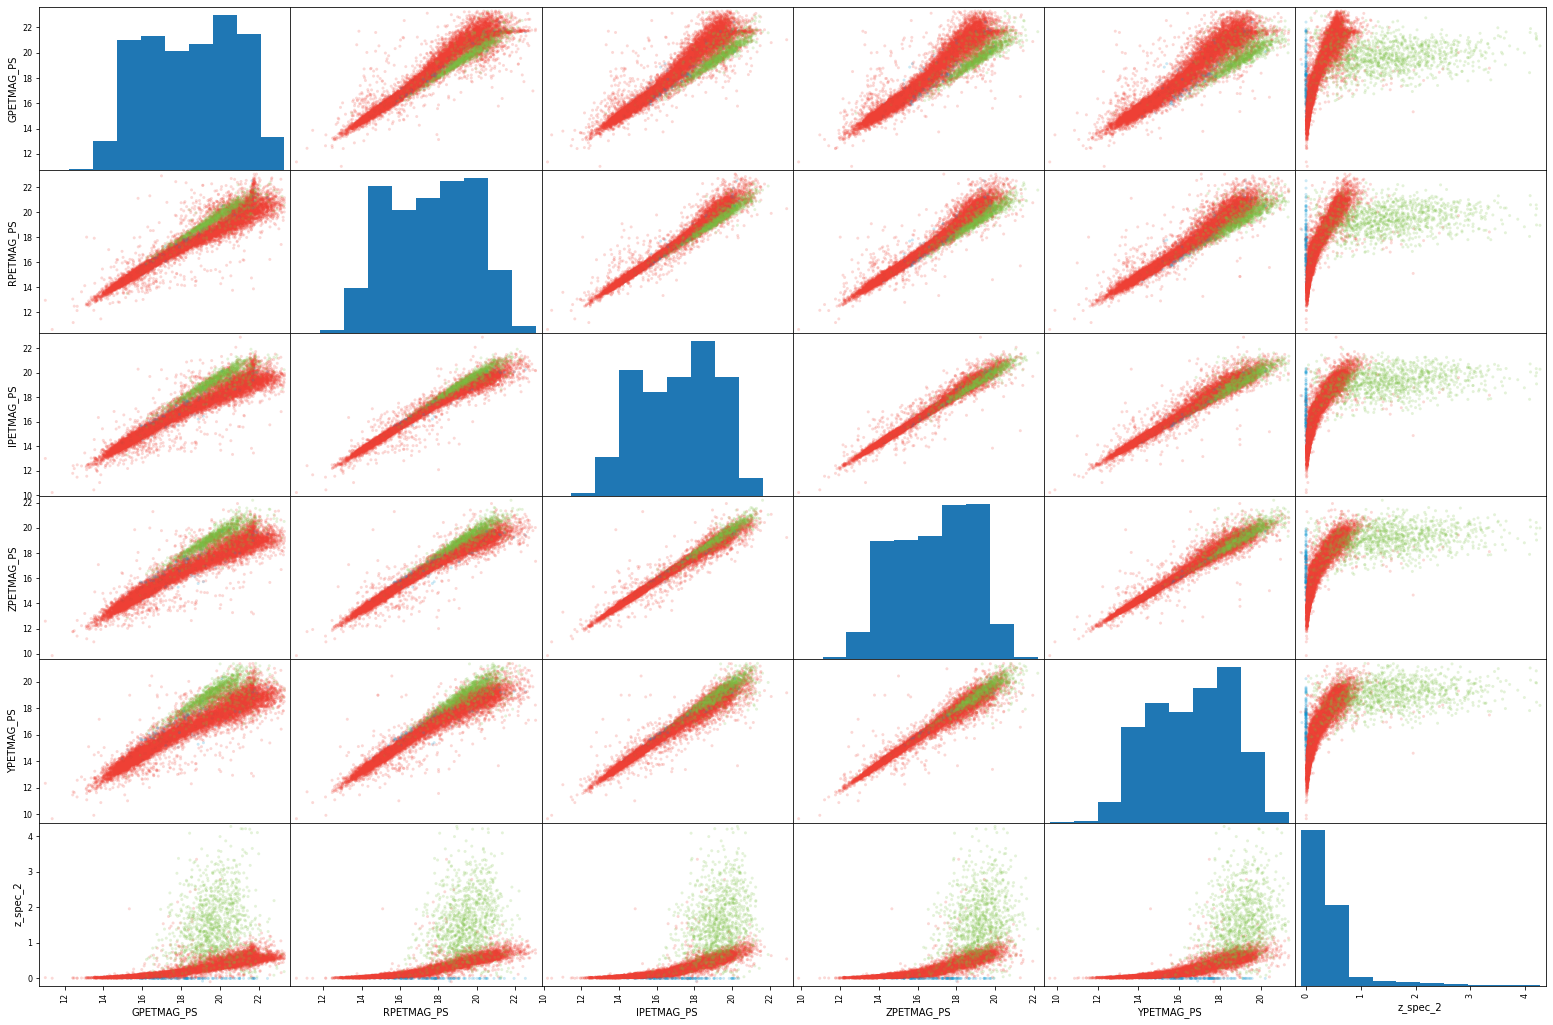

In [169]:
attributes = ["GPETMAG_PS","RPETMAG_PS","IPETMAG_PS","ZPETMAG_PS","YPETMAG_PS","z_spec_2",]

color_wheel = {0: "#0392cf", #blue Star
               1: "#7bc043", #green AGN
               2: "#ee4035"} #red Galaxy

colors = PS_df["class_2_2"].map(lambda x: color_wheel.get(x))

scatter_matrix(PS_df[attributes],color = colors,alpha = 0.2, figsize=(27,18))

In [170]:
SM_df

,U_PETRO_SM,V_PETRO_SM,G_PETRO_SM,R_PETRO_SM,I_PETRO_SM,Z_PETRO_SM,z_spec_3,spec_class_3
1,NaN,NaN,NaN,NaN,NaN,NaN,0.082210,2
2,18.212000,NaN,16.796000,16.242001,15.685000,15.3930,0.062222,2
3,17.046000,16.627001,16.622999,16.343000,16.448000,16.1520,0.392060,2
4,NaN,NaN,NaN,NaN,NaN,NaN,2.366051,1
5,19.045700,NaN,19.108101,19.036900,18.555799,18.8890,0.271035,2
...,...,...,...,...,...,...,...,...
259234,20.344299,NaN,18.602699,18.070601,18.316999,17.4932,1.321800,1
259235,NaN,NaN,NaN,NaN,NaN,NaN,0.033990,2
259236,NaN,NaN,NaN,NaN,NaN,NaN,0.195315,1
259241,18.631599,NaN,18.514000,18.856400,18.566700,18.8550,0.962628,1


In [177]:
SM_df.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14482 entries, 2 to 259241
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   U_PETRO_SM    14482 non-null  float32
 1   V_PETRO_SM    1791 non-null   float64
 2   G_PETRO_SM    14482 non-null  float32
 3   R_PETRO_SM    14482 non-null  float32
 4   I_PETRO_SM    14482 non-null  float32
 5   Z_PETRO_SM    14482 non-null  float32
 6   z_spec_3      14482 non-null  float64
 7   spec_class_3  14482 non-null  Int16  
dtypes: Int16(1), float32(5), float64(2)
memory usage: 664.7 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f041056dc10>,
      dtype=object)

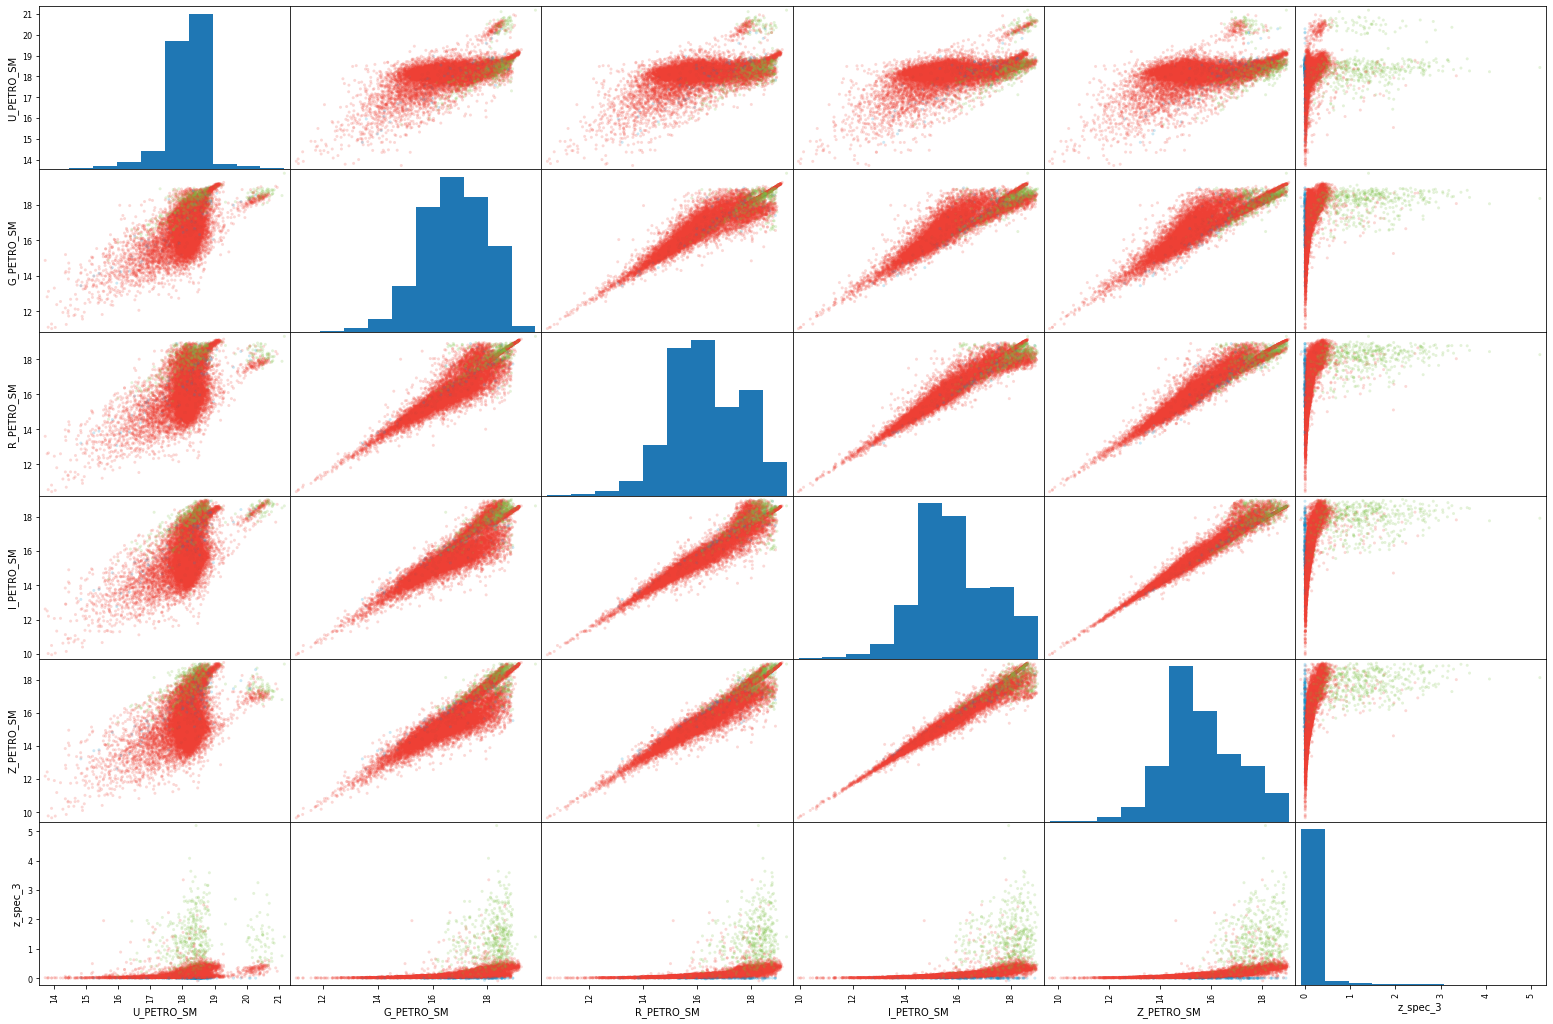

In [174]:
attributes = ["U_PETRO_SM","G_PETRO_SM","R_PETRO_SM","I_PETRO_SM","Z_PETRO_SM","z_spec_3"]

color_wheel = {0: "#0392cf", #blue Star
               1: "#7bc043", #green AGN
               2: "#ee4035"} #red Galaxy

colors = SM_df["spec_class_3"].map(lambda x: color_wheel.get(x))

scatter_matrix(SM_df[attributes],alpha = 0.2,color=colors, figsize=(27,18))